### Onde encontrar dados de series temporias


* [kaggle](https://www.kaggle.com)
* [UCI-ML Repository](https://archive.ics.uci.edu/)


##### Estados Unidos
* [Series temporais relacionadas as temperaturas e precipitação oriundas de todas as estações meterologicas do pais](https://perma.cc/EA5R-TP5L)
* [Series temporais voltadas indice mensal da taxa de desemprego norte-americana](https://www.bls.gov/)
* [Series temporais saúde](https:perma.cc/Y6KG-T948)
* [Series temporais economicas](https://fred.stlouisfed.org/) 

##### outros repositorios que deve explorar

*[compengine](https://comp-engine.org)
*[mcomp](https://cran.r-project.org/package=Mcomp)
*[m4comp2018](https://github.com/carlnetto/M4comp2018/)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**timestamp** é um ponto especifico em determinada linha do tempo que considera determinado fuso horario

In [2]:
absentismo = pd.read_csv(r'dataset/absenteeism-at-work/Absenteeism_at_work.csv', sep=';')
absentismo.head(4)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4


In [71]:
absentismo.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

cada id tem usa serie temporal

In [3]:
absentismo.loc[
    absentismo['ID'] == 11
].head(2)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


dataset yoga

In [26]:
yoga = pd.read_table('dataset/Yoga/Yoga_TRAIN.txt',
                     engine='python', sep='  ', names=['COL'+str(i) for i in range(427)])
yoga

,COL0,COL1,COL2,COL3,COL4,COL5,COL6,COL7,COL8,COL9,...,COL417,COL418,COL419,COL420,COL421,COL422,COL423,COL424,COL425,COL426
0,1.0,-0.074815,-0.099987,-0.124149,-0.147275,-0.169339,-0.190315,-0.210178,-0.228902,-0.246465,...,-0.247120,-0.222477,-0.215882,-0.193269,-0.146954,-0.109469,-0.095929,-0.080018,-0.061776,-0.061776
1,1.0,0.967688,0.955943,0.945164,0.878955,0.866626,0.858664,0.851717,0.845793,0.840895,...,0.758785,0.813263,0.864487,0.897173,0.931576,0.962237,0.947721,0.983311,0.966562,0.966562
2,2.0,0.960915,0.928332,0.896528,0.865571,0.835536,0.806443,0.778472,0.751421,0.725307,...,1.251273,1.213878,1.215984,1.223772,1.209109,1.168992,1.129659,1.091030,1.053129,1.029769
3,2.0,1.908250,1.870512,1.833674,1.797777,1.762936,1.729126,1.696371,1.630192,1.558525,...,1.805605,1.861561,1.884605,1.921539,1.955780,1.967733,1.982122,1.983149,1.952973,1.962703
4,1.0,2.016691,1.986379,1.956506,1.927195,1.898787,1.870837,1.843602,1.817182,1.791239,...,1.770280,1.825201,1.880400,1.905429,1.932446,1.989035,2.021325,2.035471,2.000326,2.000326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.0,1.254555,1.211976,1.169766,1.128142,1.087287,1.046850,1.007226,0.968215,0.929785,...,1.317127,1.233843,1.157364,1.192639,1.240421,1.287332,1.296306,1.296975,1.299919,1.300402
296,2.0,0.787621,0.809321,0.831653,0.854668,0.878357,0.902693,0.927662,0.953249,0.979467,...,0.153635,0.218376,0.282938,0.335023,0.396372,0.462093,0.528182,0.576552,0.594906,0.606735
297,2.0,1.086083,1.046765,1.077282,1.106865,1.132783,1.159234,1.186205,1.213685,1.241662,...,0.376478,0.426453,0.488384,0.556652,0.625073,0.682529,0.727184,0.778477,0.846806,0.889431
298,2.0,1.524485,1.517690,1.511278,1.505273,1.499713,1.494609,1.489995,1.485786,1.482006,...,1.068574,1.107929,1.146974,1.178067,1.213130,1.252769,1.291767,1.323730,1.360121,1.384950


In [40]:
homem = yoga.loc[
    yoga['COL0'] ==1.0
].iloc[[0,1]].values

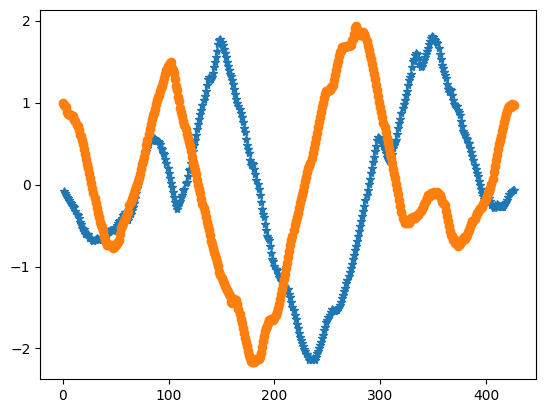

In [69]:
plt.plot(homem[0], '*')
plt.plot(homem[1], 'o')
plt.show()

In [53]:
mulher = yoga.loc[
    yoga['COL0'] == 2.0
].iloc[[2,3]].values

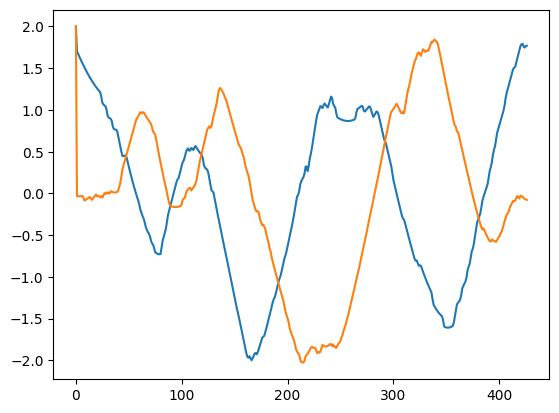

In [54]:
plt.plot(mulher[0])
plt.plot(mulher[1])
plt.show()

> Não e um boa ideia tentar aprender com base no no dados do gov americano